Load the Pandas libraries with alias. This is a good practice.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

 Read data from file 'pp-2018.csv' 
 Control delimiters, rows, column names with read_csv (see later) 

In [2]:
colNames = ['hash','price','date','postcode','A','B','C','streetnumber','D','street','E','city','zone1','zone2','F','G']
data = pd.read_csv("pp-2018.csv", header=None, names=colNames) 

Preview of data

In [3]:
print (data.shape)

(627004, 16)


concatenate strings

In [4]:
print ("there are {} transactions.".format(len(data.index)))

there are 627004 transactions.


a quick statistic summary of the data.  Add GBP symbol in front of price
#pd.options.display.float_format = '£{:,.2f}'.format

In [5]:
T=chr(163)+'{:,.2f}'
pd.options.display.float_format = T.format
print (data.describe())

                price
count     £627,004.00
mean      £344,218.71
std     £1,869,618.00
min            £85.00
25%       £143,000.00
50%       £227,000.00
75%       £354,000.00
max   £569,200,000.00


Locate the entry of max value

In [6]:
print(data.loc[data['price'] == 569200000])

                                          hash      price              date  \
132167  {666758D7-A512-3363-E053-6B04A8C0D74E}  569200000  2018-02-08 00:00   

       postcode  A  B  C streetnumber    D        street    E    city  \
132167  W1J 7BT  O  N  F            2  NaN  STANHOPE ROW  NaN  LONDON   

                      zone1           zone2  F  G  
132167  CITY OF WESTMINSTER  GREATER LONDON  B  A  


Locate the entry of min value

In [7]:
print(data.loc[data['price'] == 85])


                                         hash  price              date  \
64683  {75050A84-CA6D-9A88-E053-6B04A8C02390}     85  2018-07-27 00:00   

       postcode  A  B  C streetnumber    D       street    E          city  \
64683  SK11 8AX  T  N  F           66  NaN  RYLE STREET  NaN  MACCLESFIELD   

               zone1          zone2  F  G  
64683  CHESHIRE EAST  CHESHIRE EAST  A  A  


how to plot a histogram

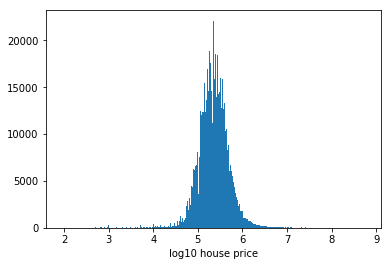

In [8]:
T=np.asarray(data.price.tolist());
plt.hist(np.log10(T),340);
plt.xlabel('log10 house price')
plt.show()

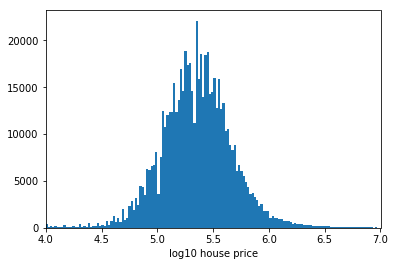

In [9]:
plt.hist(np.log10(T),340);
plt.xlabel('log10 house price')
plt.xlim([4,7])
plt.show()

Report unique value in City columns

In [10]:
print ("there are {} cities.".format(len(data.city.unique())))

there are 1146 cities.


In [11]:
data.city.value_counts()

LONDON                 40376
MANCHESTER             11226
BIRMINGHAM              9769
BRISTOL                 9615
NOTTINGHAM              8735
LIVERPOOL               8069
LEEDS                   7395
SHEFFIELD               6142
LEICESTER               5790
NORWICH                 4792
SOUTHAMPTON             4742
STOKE-ON-TRENT          4229
NEWCASTLE UPON TYNE     4177
CARDIFF                 3968
NORTHAMPTON             3821
DERBY                   3771
COVENTRY                3625
READING                 3606
HULL                    3570
YORK                    3567
DONCASTER               3492
SWINDON                 3369
BRADFORD                3308
PRESTON                 3298
PLYMOUTH                3286
PETERBOROUGH            3119
STOCKPORT               3074
COLCHESTER              3053
BOLTON                  2981
NEWPORT                 2905
                       ...  
PENYSARN                  11
CALSTOCK                  10
LLWYNGWRIL                10
LLANBEDR      

In [12]:
df1 = data.loc[data['city'] == "LONDON"]
print (df1)

                                          hash     price              date  \
854     {75050A85-AA0F-9A88-E053-6B04A8C02390}    665000  2018-08-01 00:00   
855     {75050A85-AA10-9A88-E053-6B04A8C02390}    510000  2018-07-27 00:00   
860     {75050A85-AA16-9A88-E053-6B04A8C02390}    575000  2018-07-20 00:00   
862     {75050A85-AA18-9A88-E053-6B04A8C02390}   4100000  2018-08-03 00:00   
863     {75050A85-AA19-9A88-E053-6B04A8C02390}   1230000  2018-07-20 00:00   
1221    {75050A85-AE63-9A88-E053-6B04A8C02390}   1885000  2018-07-17 00:00   
1550    {726BF13A-5403-0A46-E053-6C04A8C01D0D}    347000  2018-06-13 00:00   
1555    {726BF13A-5404-0A46-E053-6C04A8C01D0D}    890000  2018-07-10 00:00   
1564    {726BF13A-5402-0A46-E053-6C04A8C01D0D}    339000  2018-07-18 00:00   
1704    {75050A85-BC5A-9A88-E053-6B04A8C02390}   1050000  2018-07-25 00:00   
1705    {75050A85-BC5B-9A88-E053-6B04A8C02390}    407500  2018-08-13 00:00   
1706    {75050A85-BC5C-9A88-E053-6B04A8C02390}    140000  2018-0

In [13]:
df1.sort_values(['date'], ascending=[True]);

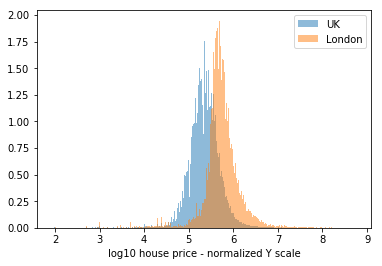

In [14]:
T1=np.asarray(df1.price.tolist());
plt.hist(np.log10(T),340,density=True, alpha=0.5, label='UK');
plt.hist(np.log10(T1),340,density=True,alpha=0.5, label='London');
plt.xlabel('log10 house price - normalized Y scale')
plt.legend(loc='best')
plt.show()

In [15]:
df1['date'].groupby(df1.date.dt.to_period("M")).agg('count').plot(kind='bar') 

AttributeError: Can only use .dt accessor with datetimelike values

In [17]:
print ("there are {} zones.".format(len(df1.zone1.unique())))

there are 30 zones.


In [18]:
df1.zone1.value_counts()

WANDSWORTH                3495
NEWHAM                    2586
SOUTHWARK                 2509
LAMBETH                   2464
GREENWICH                 2341
LEWISHAM                  2252
TOWER HAMLETS             2246
CITY OF WESTMINSTER       2133
BARNET                    2071
WALTHAM FOREST            2046
HAMMERSMITH AND FULHAM    1758
HACKNEY                   1646
HARINGEY                  1617
CAMDEN                    1579
KENSINGTON AND CHELSEA    1286
EALING                    1285
ISLINGTON                 1268
BRENT                     1129
MERTON                    1061
ENFIELD                   1045
CROYDON                    649
BROMLEY                    481
HOUNSLOW                   380
REDBRIDGE                  365
RICHMOND UPON THAMES       288
CITY OF LONDON             254
BEXLEY                     113
EPPING FOREST               15
KINGSTON UPON THAMES        13
HARLOW                       1
Name: zone1, dtype: int64